# Importación de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.sparse import csr_matrix
from scipy.stats import randint

from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC

import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Carga de datos y Preprocesamiento

Importamos el dataset de entrenamiento

In [2]:
df = pd.read_csv("./train.csv")

ds_trabajo = df.copy()
ds_trabajo.head(5)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


Creamos una función para mostrar las métricas y la matriz de confusión de nuestras predicciones.

In [3]:
def mostrar_metricas(y_test, y_pred):
    print("La accuracy es {}".format(accuracy_score(y_test, y_pred)))
    print("La precision es {}".format(precision_score(y_test, y_pred, average='macro')))
    print("El recall es {}".format(recall_score(y_test, y_pred, average='macro')))
    print("El F1 es {}".format(f1_score(y_test, y_pred, average='macro')))

    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
    plt.xlabel('Valores Predicción')
    plt.ylabel('Valores Reales')

Obtenemos las stopwords en español de la bibliotecta nltk para eliminarlas de los textos posteriormente.

In [4]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to C:\Users\camila.bartocci.
[nltk_data]     GLOBALAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vamos a aplicar las técnicas de lemmatización y stemming para reducir la cantidad y la complejidad de las palabras en los textos, generando dos datasets distintos con estos preprocesamientos para utilizar a lo largo del trabajo.

Nota: vamos a dejar los preprocesamientos aplicados comentados y los guardaremos en los csv `train_normalizado_lematizacion.csv` y `train_normalizado_stemming.csv`. Vamos a hacer lo mismo para `test.csv`.

In [79]:
## Aplicamos lemmatizacion
# import re
# ds_trabajo.review_es = ds_trabajo.review_es.str.lower();
# ds_trabajo.review_es = ds_trabajo.review_es.apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
# ds_trabajo.review_es

In [80]:
# nlp = spacy.load('es_core_news_sm')

# # Realizar la lematización en la columna 'Texto'
# ds_trabajo.review_es = ds_trabajo.review_es.apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

# print(ds_trabajo.review_es)

In [81]:
## Aplicamos stemming
# from nltk.stem import SnowballStemmer

# stemmer = SnowballStemmer('spanish')

# ds_trabajo.review_es = ds_trabajo.review_es.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# print(ds_trabajo.review_es)

Dividimos el dataset usando train-test split 80/20.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(ds_trabajo.review_es, ds_trabajo.sentimiento, test_size=0.2, random_state=42)

Y observamos que los conjuntos luego del split quedaron balanceados.

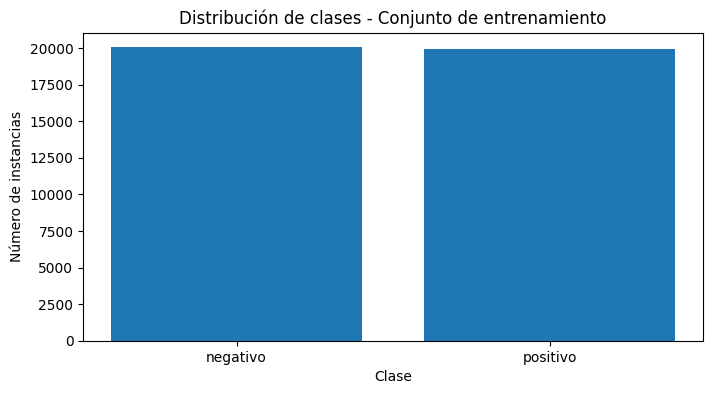

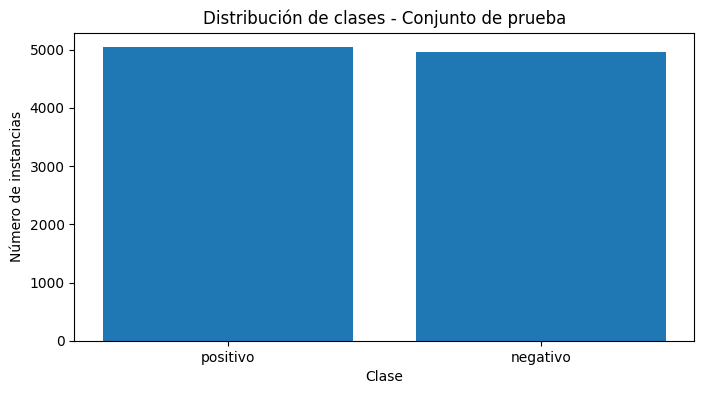

In [83]:
import matplotlib.pyplot as plt

train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts()

# Visualización del conjunto de entrenamiento
plt.figure(figsize=(8, 4))
plt.bar(train_class_counts.index, train_class_counts.values)
plt.title('Distribución de clases - Conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.show()

# Visualización del conjunto de prueba
plt.figure(figsize=(8, 4))
plt.bar(test_class_counts.index, test_class_counts.values)
plt.title('Distribución de clases - Conjunto de prueba')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.show()

Por último, vamos a trabajar con las etiquetas de sentimiento, 'negativo' y 'positivo', como 0 y 1 para realizar los entrenamientos y las predicciones.

In [ ]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Bayes Naïve

## Bayes Naïve con CountVectorizer

Como primer modelo vamos a probar Bayes Naïve tokenizando con CountVectorizer y eliminando las stopwords. Usaremos un clasificador multinomial y técnica de Laplace Smoothing con alpha = 1.

In [ ]:
modelo = make_pipeline(CountVectorizer(stop_words=stopwords, ngram_range=(1,3)), MultinomialNB(alpha=1))
modelo.fit(X_train, y_train_encoded)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('multinomialnb', MultinomialNB(alpha=1))])

Observamos que las métricas dan todas similares, cercanas al 88%.

La accuracy es 0.8805
La precision es 0.8811218585987137
El recall es 0.8806619994760481
El F1 es 0.8804769069431906


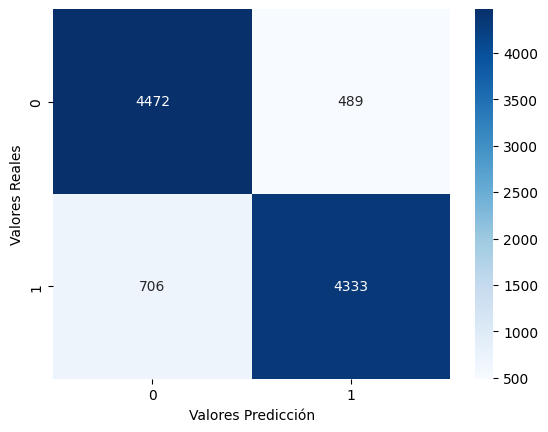

In [ ]:
y_pred_encoded = modelo.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

## Bayes Naïve con TfidfVectorizer

Vamos a entrenar un segundo modelo Bayes Naïve, esta vez utilizando valores normalizados, computando la frecuencia inversa de cada término con TfidfVectorizer.

In [ ]:
modelo_2 = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)), MultinomialNB(alpha=1))

modelo_2.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('multinomialnb', MultinomialNB(alpha=1))])

Observando las métricas, estas dieron un poco más bajas que con CountVectorizer, pero cercanas igualmente al 88%.

La accuracy es 0.878
La precision es 0.8781962537270845
El recall es 0.8780939832379402
El F1 es 0.8779967010307957


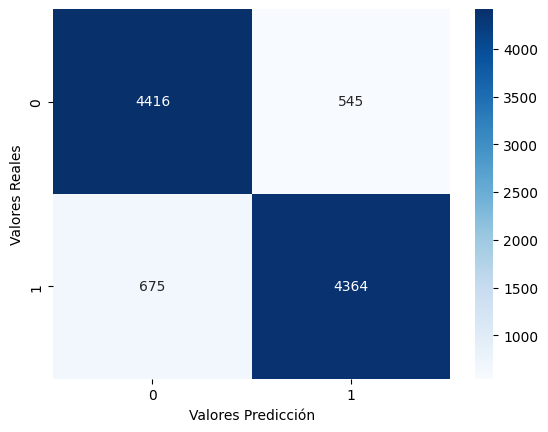

In [ ]:
y_pred_encoded = modelo_2.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

## Optimización de hiperparámetros

Vamos a buscar optimizar hiperparámetros para los modelos Bayes Naïve con CountVectorizer y con TfidfVectorizer (conservando la eliminación de stopwords), utilizando k-fold Cross Validation y Random Search.

Ajustaremos el parámetro de suavizado aditivo (alpha), el fit prior y el rango de n-grama a aplicar. Vamos a usar las etiquetas codificadas numéricamente, usando el y_train_encoded, optimizando primero para la codificación con TfidfVectorizer.

In [ ]:
parametros = {
    'multinomialnb__alpha': np.arange(0, 1.2, 0.2),
    'multinomialnb__fit_prior': [True, False],
    'tfidfvectorizer__ngram_range': [(1, 2), (1, 3)]
}

pipeline = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)), MultinomialNB(force_alpha=True))

random_search = RandomizedSearchCV(pipeline, parametros, scoring='f1', cv=5, n_iter=5)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:907: RuntimeWarning: divide by z

Mejores parametros: {'tfidfvectorizer__ngram_range': (1, 3), 'multinomialnb__fit_prior': True, 'multinomialnb__alpha': 0.2}
Mejor puntaje: 0.8807425342161377


Entrenamos el mejor modelo obtenido, el cual presenta los siguientes hiperparámetros:
ngram_range de (1, 3), fit_prior en False y alpha de 0.2.

In [ ]:
mejor_modelo.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('multinomialnb', MultinomialNB(alpha=0.2, force_alpha=True))])

Realizamos las predicciones y analizamos sus métricas. Podemos ver que, tras la optimización de hiperparámetros, conservamos métricas similares a las obtenidas originalmente, todas cercanas a 88.69%.

La accuracy es 0.8869
La precision es 0.886977697769777
El recall es 0.886962542801104
El F1 es 0.8868998631488344


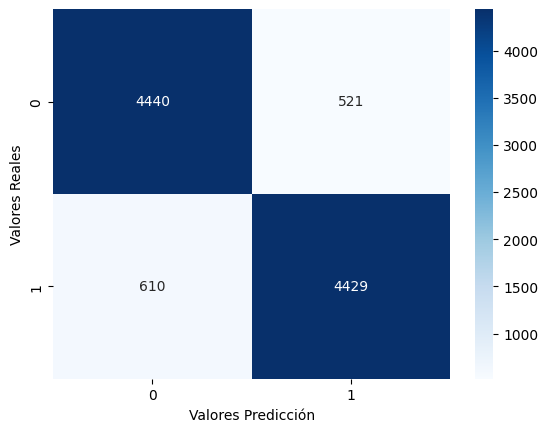

In [ ]:
y_pred_encoded = mejor_modelo.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Ahora probaremos optimizar hiperparámetros para la codificación con CountVectorizer.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

parametros = {
    'multinomialnb__alpha': np.arange(0, 1.2, 0.2),
    'multinomialnb__fit_prior': [True, False],
    'countvectorizer__ngram_range': [(1, 2), (1, 3)]
}

pipeline = make_pipeline(CountVectorizer(stop_words=stopwords, ngram_range=(1,3)), MultinomialNB())

random_search = RandomizedSearchCV(pipeline, parametros, scoring='f1', cv=5, n_iter=5)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")


C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10.

Mejores parametros: {'multinomialnb__fit_prior': False, 'multinomialnb__alpha': 0.6000000000000001, 'countvectorizer__ngram_range': (1, 3)}
Mejor puntaje: 0.8686147563957196


Los mejores hiperparámetros obtenidos para CountVectorizer son similares a los anteriores, pero con alpha 0.6.

In [ ]:
mejor_modelo.fit(X_train, y_train_encoded)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('multinomialnb',
                 MultinomialNB(alpha=0.6000000000000001, fit_prior=False))])

De nuevo, las métricas son similres a las obtenidas originalmente. Sin embargo, esta vez son ligeramente menores que las métricas con la tokenización TfidfVectorizer.

La accuracy es 0.8799
La precision es 0.8805335715086753
El recall es 0.8800635230647432
El F1 es 0.8798761181710535


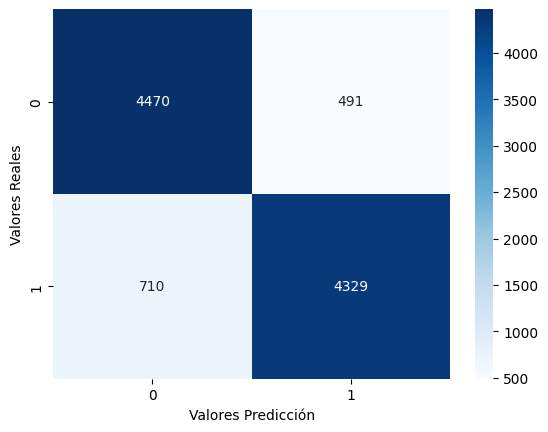

In [ ]:
y_pred_encoded = mejor_modelo.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Para Bayes Naïve, no obtuvimos cambios significativos tras la optimización de hiperparámetros, para ninguno de los tres datasets de entrenamiento preprocesados.

# Random Forest

Empezamos creando un modelo Random Forest por default, eliminando stopwords y usando ngram entre 1 y 3 y observamos las métricas obtenidas.

In [ ]:
modelo_rf = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)), RandomForestClassifier())

modelo_rf.fit(X_train, y_train_encoded)

Tenemos métricas similares en todos los casos.

La accuracy es 0.8526
La precision es 0.8526173362564071
El recall es 0.8526347142960178
El F1 es 0.8525992865805472


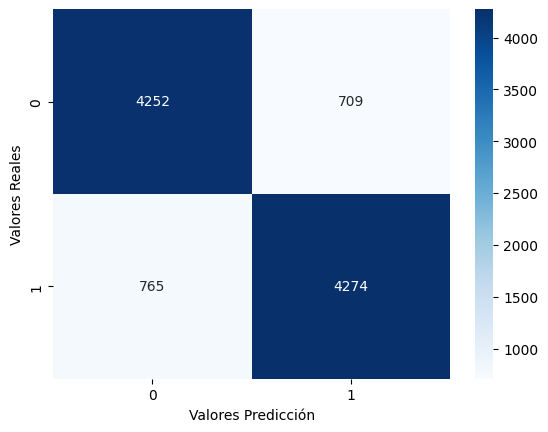

In [ ]:
y_pred_encoded = modelo_rf.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred.astype)

## Optimización de hiperparámetros

Aplicamos Random Search y k-fold Cross Validation para buscar los mejores hiperparámetros de un modelo Random Forest.

(Nota: vamos a estar realizando iteraciones de RandomSearch para obtener hiperparámetros optimizados, intentando con Grid Search tardó demasiado y no logramos terminar de correrlo).

In [ ]:
parametros = {
    'randomforestclassifier__n_estimators': [130, 150, 200, 300],
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 25, 30, 35],
    'randomforestclassifier__min_samples_split': [5, 10, 20],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
}

pipeline = make_pipeline(
    TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)),
    RandomForestClassifier()
)

random_search = RandomizedSearchCV(
    pipeline,
    parametros,
    scoring='f1',
    n_iter=15,
    cv=6,
    random_state=42
)

random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

Mejores parametros: {'randomforestclassifier__n_estimators': 300, 'randomforestclassifier__min_samples_split': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 35, 'randomforestclassifier__criterion': 'entropy'}
Mejor puntaje: 0.8507545687231283


In [ ]:
mejor_modelo.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=35,
                                        min_samples_split=20,
                                        n_estimators=300))])

Analizamos las métricas del mejor modelo obtenido en esta iteración.

La accuracy es 0.8531
La precision es 0.8534090565018482
El recall es 0.8529826354635417
El F1 es 0.8530307936704316


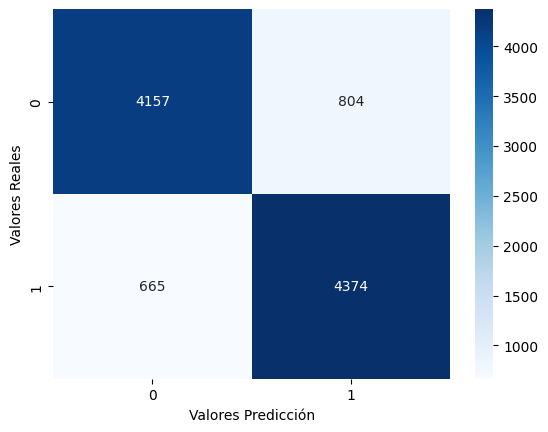

In [ ]:
y_pred_encoded = mejor_modelo.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

El mejor modelo Random Forest que obtuvimos tiene un F1 score aproximado de 85% en entrenamiento:

* 300 estimadores
* 10 min samples split
* 3 min hojas
* 35 máx profundidad
* criterio entropía

Obtuvimos 73% en test.

# XGBoost


Comenzamos con un modelo XGBoost por default, conservando el pipeline que utiliza TfidfVectorizer, elimina stopwords y tiene ngram range de 1 a 3.

In [ ]:
modelo_xgb = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)), xgb.XGBClassifier())

modelo_xgb.fit(X_train, y_train_encoded)

y_pred = modelo_xgb.predict(X_test)

Obtuvimos métricas cercanas a 84%.

La accuracy es 0.8444
La precision es 0.8444075048683227
El recall es 0.8443702514861005
El F1 es 0.8443831684835031


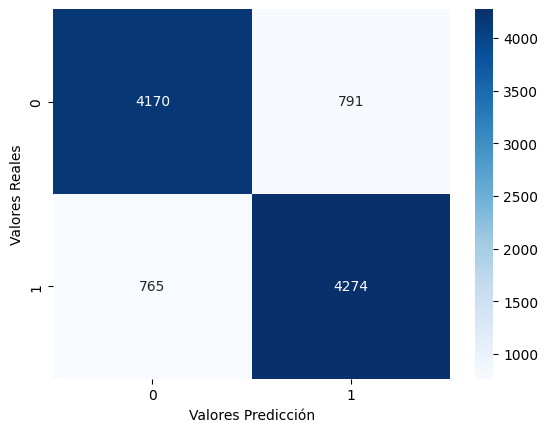

In [ ]:
y_pred_encoded = modelo_xgb.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

## Optimización de hiperparámetros

Aplicamos Random Search para buscar los mejores hiperparámetros de un modelo XGBoost Classifier.

In [ ]:
parametros_xgboost = {
    'xgbclassifier__learning_rate': [0.05, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__n_estimators': [50, 100, 150],
    'xgbclassifier__gamma': [0, 0.1, 0.2],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
}
pipeline= make_pipeline(TfidfVectorizer(stop_words=stopwords), xgb.XGBClassifier())
random_search=   RandomizedSearchCV(pipeline, parametros_xgboost,scoring="f1",cv=5)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo_xgb = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

Mejores parametros: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__max_depth': 7, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__colsample_bytree': 1.0}
Mejor puntaje: 0.845043755036793


In [ ]:
mejor_modelo_xgb.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_byno...
                               feature_types=None, gamma=0.1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Obtuvimos métricas ligeramente mejores para el XGBoost con hiperparámetros optimizados en entrenamiento, sin embargo en test funcionó mejor el XGBoost default.

La accuracy es 0.8473
La precision es 0.8476720794552952
El recall es 0.8471698018107421
El F1 es 0.8472170556673513


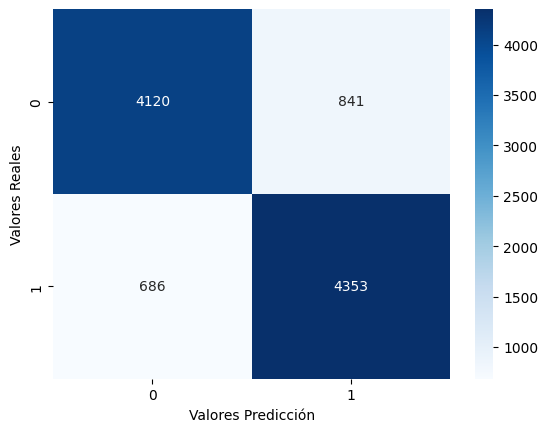

In [ ]:
y_pred_encoded = mejor_modelo_xgb.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

# Ensambles de Modelos

Vamos a probar distintos ensambles de modelos, utilizando ensambles Voting y Stacking, y optimizando hiperparámetros para cada uno.

Para el entrenamiento, vamos a usar el pipeline con TfidfVectorizer, eliminando stopwords y utilizando unigramas, bigramas y trigramas según el caso. Utilizaremos las columnas codificadas como 0s y 1s para el entrenamiento y la predicción. Adicionalmente, vamos a optimizar hiperparámetros utilizando k-fold Cross Validation y Random Search.

## Voting

Vamos a crear un primer ensamble híbrido Voting, compuesto por un árbol de decisión, una regresión logística y un modelo Bayes Naive.

In [ ]:
modelo1 = DecisionTreeClassifier()
modelo2 = LogisticRegression()
modelo3 = MultinomialNB()

ensamble = VotingClassifier(estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)], voting='hard')

modelo_ensamble = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)), ensamble)

modelo_ensamble.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('modelo1',
                                               DecisionTreeClassifier()),
                                              ('modelo2', LogisticRegression()),
                                              ('modelo3', MultinomialNB())]))])

Analizamos sus métricas. Son todas cercanas al 88%. En test obtuvimos 72% aproximadamente.

La accuracy es 0.8807
La precision es 0.880761256258412
El recall es 0.8806498387361887
El F1 es 0.880678893289434


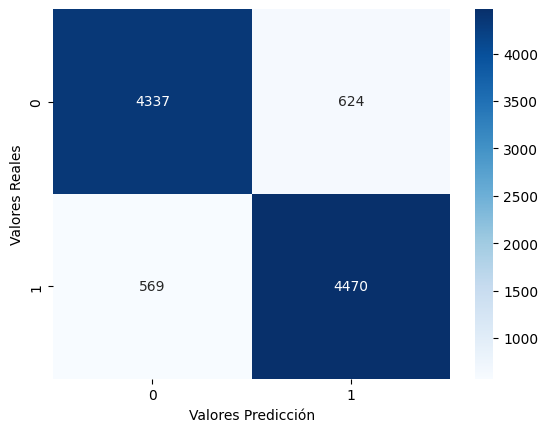

In [ ]:
y_pred_encoded = modelo_ensamble.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

### Optimización de hiperparámetros

Ahora optimizaremos hiperparámetros para el ensamble anterior.

In [ ]:
parametros_ensamble = {
    'votingclassifier__modelo1__max_depth': [5, 7, 15, 20],
    'votingclassifier__modelo1__min_samples_split': [2, 5, 10],
    'votingclassifier__modelo1__min_samples_leaf': [1, 2, 3],
    'votingclassifier__modelo2__C': [0.1, 1, 10],
    'votingclassifier__modelo2__penalty': ['l1', 'l2', 'elasticnet'],
    'votingclassifier__modelo3__alpha': [0.1, 0.5, 1]
}

modelo1 = DecisionTreeClassifier()
modelo2 = LogisticRegression()
modelo3 = MultinomialNB()

ensamble = VotingClassifier(estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)], voting='hard')

pipeline = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)),
                         ensamble)

random_search = RandomizedSearchCV(pipeline, parametros_ensamble, scoring='f1', n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo_ensamble = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

In [ ]:
mejor_modelo_ensamble.fit(X_train, y_train_encoded)

c:\Users\franco.patiño\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('modelo1',
                                               DecisionTreeClassifier(max_depth=15,
                                                                      min_samples_split=5)),
                                              ('modelo2',
                                               LogisticRegression(C=10)),
                                              ('modelo3',
                                               MultinomialNB(alpha=0.5))]))])

Las métricas dieron similares al modelo sin optimizar.

La accuracy es 0.8899
La precision es 0.8902653839375831
El recall es 0.8897833144168491
El F1 es 0.8898471696010124


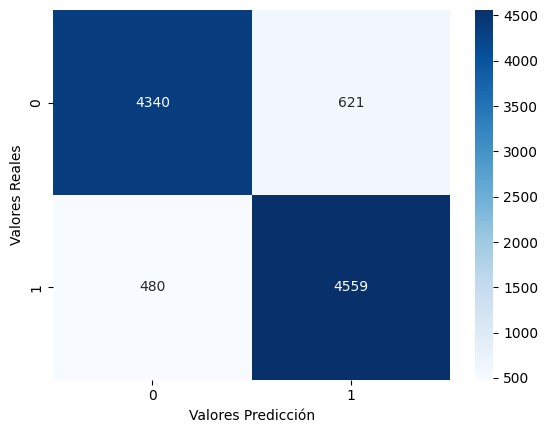

In [ ]:
y_pred_encoded = mejor_modelo_ensamble.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Este es el modelo con el que obtuvimos la mejor submission para ensamble voting en Kaggle:
* MultinomialNb con alpha 0.5
* LogisticRegression con penalización L2 y regularización 10
* DecisionTree con mínima cantidad de hojas 1, mínimo split 5 y profundidad máxima 15

El mejor puntaje obtenido en entrenamiento es, aproximadamente, 0.889 de F1 y 0.739 en test.

Vamos a intentar mejorar este score probando otros ensambles de modelos con Voting.

Probamos optimizando hiperparámetros para un ensamble híbrido de Bayes Naive, árbol de decisión y un KNN.

In [ ]:
parametros_ensamble = {
    'votingclassifier__modelo1__alpha': [0.1, 0.2, 0.5, 1],
    'votingclassifier__modelo2__max_depth': [10, 15, 20],
    'votingclassifier__modelo2__min_samples_split': [2, 5, 10],
    'votingclassifier__modelo2__min_samples_leaf': [1, 2, 3],
    'votingclassifier__modelo3__n_neighbors': [3, 5, 7],
    'tfidfvectorizer__ngram_range': [(1, 2), (1, 3)]
}

modelo1 = MultinomialNB()
modelo2 = DecisionTreeClassifier()
modelo3 = KNeighborsClassifier()

ensamble = VotingClassifier(estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)], voting='hard')

pipeline = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1,3)),
                         ensamble)

random_search = RandomizedSearchCV(pipeline, parametros_ensamble, scoring='f1', n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo_ensamble = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

Mejores parametros: {'votingclassifier__modelo3__n_neighbors': 7, 'votingclassifier__modelo2__min_samples_split': 10, 'votingclassifier__modelo2__min_samples_leaf': 2, 'votingclassifier__modelo2__max_depth': 20, 'votingclassifier__modelo1__alpha': 0.1, 'tfidfvectorizer__ngram_range': (1, 2)}
Mejor puntaje: 0.8585722517026037


In [ ]:
# Entrenar el ensamble de modelos
mejor_modelo_ensamble.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('modelo1',
                                               MultinomialNB(alpha=0.1)),
                                              ('modelo2',
                                               DecisionTreeClassifier(max_depth=20,
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=10)),
                                              ('modelo3',
                                               KNeighborsClassifier(n_neighbors=7))]))])

En este caso, obtuvimos métricas un poco más bajas en entrenamiento comparado al ensamble anterior. Sin embargo, obtuvimos métricas considerablemente más bajas en test (aproximadamente 0.67).

La accuracy es 0.8655
La precision es 0.8668227302645111
El recall es 0.86526638280673
El F1 es 0.8653185989677636


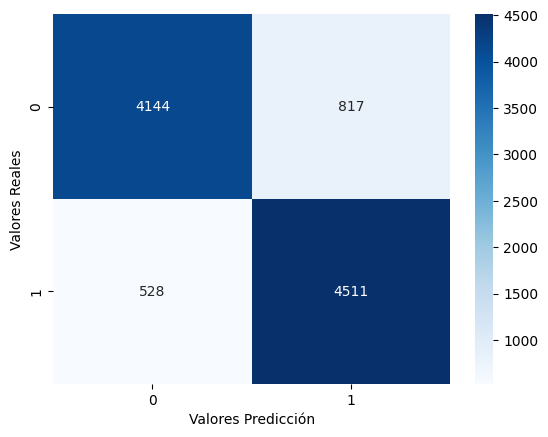

In [ ]:
y_pred_encoded = mejor_modelo_ensamble.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Probamos ahora un ensamble compuesto por un Bayes Naive, una regresión logística y un xgboost.

In [ ]:
parametros_ensamble = {
    'votingclassifier__modelo1__alpha': [0.1, 0.5, 1],
    'votingclassifier__modelo2__C': [0.1, 1, 10],
    'votingclassifier__modelo3__learning_rate': [0.05, 0.1],
    'votingclassifier__modelo3__max_depth': [5, 10, 15],
    'votingclassifier__modelo3__n_estimators': [5, 10, 20],
    'votingclassifier__modelo3__reg_alpha': [0.001, 0.005, 0.01, 0.05],
}

modelo1 = MultinomialNB()
modelo2 = LogisticRegression()
modelo3 = xgb.XGBClassifier()

ensamble = VotingClassifier(estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)], voting='hard')

pipeline = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2)),
                         ensamble)

random_search = RandomizedSearchCV(pipeline, parametros_ensamble, scoring='f1', n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo_ensamble5 = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

Los mejores parámetros:

{'votingclassifier__modelo3__reg_alpha': 0.01,
'votingclassifier__modelo3__n_estimators': 20,
'votingclassifier__modelo3__max_depth': 15,
'votingclassifier__modelo3__learning_rate': 0.05,
'votingclassifier__modelo2__C': 1, 'votingclassifier__modelo1__alpha': 0.1}

Mejor puntaje: 0.8821474623717969

In [ ]:
# Entrenar el ensamble de modelos
mejor_modelo_ensamble5.fit(X_train, y_train_encoded)

En este caso, obtuvimos un F1 score aproximadamente de 0.8865 en entrenamiento y 0.7354 en test.

In [ ]:
y_pred_encoded = mejor_modelo_ensamble5.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

## Stacking

Empezamos por entrenar un modelo de ensamble híbrido Stacking compuesto por una SVM Lineal, un Random Forest y un Bayes Naive como modelos base, y usando Regresión Logística como estimador final, sin optimizar hiperparámetros.

In [ ]:
modelo1 = LinearSVC()
modelo2 = RandomForestClassifier()
modelo3 = MultinomialNB()

ensamble = StackingClassifier(
    estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)],
    final_estimator=LogisticRegression()
)

pipeline = make_pipeline(
    TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2)),
    ensamble
)

pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('modelo1', LinearSVC()),
                                                ('modelo2',
                                                 RandomForestClassifier()),
                                                ('modelo3', MultinomialNB())],
                                    final_estimator=LogisticRegression()))])

Obtuvimos un score de, aproximadamente, 90% en train y 74.16% en test con este modelo, mejorando así las métricas obtenidas con el ensamble voting.

La accuracy es 0.9033
La precision es 0.903445035036059
El recall es 0.9032293724750213
El F1 es 0.9032749278940594


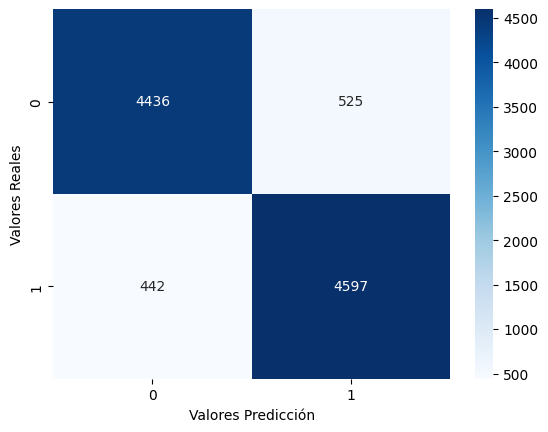

In [ ]:
y_pred_encoded = pipeline.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Probamos un ensamble distinto por default, esta vez con árbol de decisión, regresión logística y Bayes Naive como modelos base y regresión logística como modelo final.

In [ ]:
modelo1 = DecisionTreeClassifier()
modelo2 = LogisticRegression(max_iter=500)
modelo3 = MultinomialNB()

ensamble = StackingClassifier(
    estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)],
    final_estimator=LogisticRegression(max_iter=500)
)

pipeline = make_pipeline(
    TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2)),
    ensamble
)

pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('modelo1',
                                                 DecisionTreeClassifier()),
                                                ('modelo2',
                                                 LogisticRegression(max_iter=500)),
                                                ('modelo3', MultinomialNB())],
                                    final_estimator=LogisticRegression(max_iter=500)))])

Obtuvimos métricas más bajas que con el primer stacking.

La accuracy es 0.8868
La precision es 0.8869836718614867
El recall es 0.8867166678420715
El F1 es 0.8867649243029521


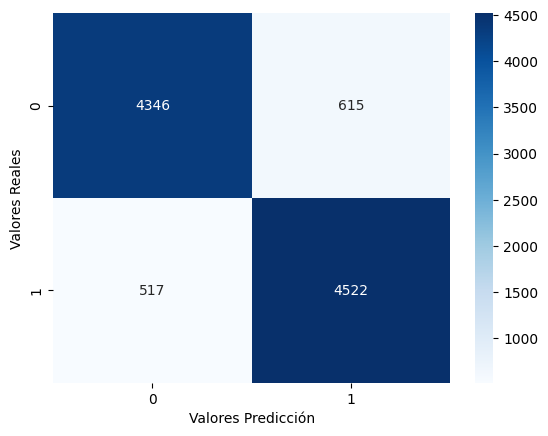

In [ ]:
y_pred_encoded = pipeline.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

### Optimización de hiperparámetros

Vamos a optimizar hiperparámetros para mejorar la métrica del ensamble stacking con SVM lineal, Random Forest y Bayes Naive como modelos base, y regresión logística como estimador final.

In [ ]:
parametros_ensamble = {
    'stackingclassifier__modelo1__C': [0.2, 0.5, 1],
    'stackingclassifier__modelo2__n_estimators': [100, 200, 300],
    'stackingclassifier__modelo2__max_depth': [5, 10, 15],
    'stackingclassifier__modelo3__alpha': [0.1, 0.5, 1],
    'stackingclassifier__final_estimator__C': [0.1, 1, 10]
}

# Modelos base
modelo1 = LinearSVC()
modelo2 = RandomForestClassifier()
modelo3 = MultinomialNB()

# Meta Modelo
meta_model = LogisticRegression(max_iter=500)

ensamble = StackingClassifier(estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)],
                              final_estimator=meta_model,
                              cv=5)


pipeline = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2)),
                         ensamble)


random_search = RandomizedSearchCV(pipeline, parametros_ensamble, scoring='f1', n_iter=3, cv=5, random_state=42)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo_stacking1 = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

Mejores parametros: {'stackingclassifier__modelo3__alpha': 1, 'stackingclassifier__modelo2__n_estimators': 300, 'stackingclassifier__modelo2__max_depth': 10, 'stackingclassifier__modelo1__C': 1, 'stackingclassifier__final_estimator__C': 1}
Mejor puntaje: 0.895817419399755


In [ ]:
mejor_modelo_stacking1.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('stackingclassifier',
                 StackingClassifier(cv=5,
                                    estimators=[('modelo1', LinearSVC(C=1)),
                                                ('modelo2',
                                                 RandomForestClassifier(max_depth=10,
                                                                        n_estimators=300)),
                                                ('modelo3',
                                                 MultinomialNB(alpha=1))],
                                    final_estimator=LogisticRegression(C=1,
                                                                       max_iter=500)))])

Obtuvimos, aproximadamente, 90.16% en entrenamiento y 74.239% en test, siendo este el mejor modelo obtenido para ensamble híbrido Stacking (y para test también):

* MultinomialNB con alpha igual a 1
* RandomForest con 300 estimadores, profundidad máxima de 10
* SVM Lineal con regularización 1
* LogisticRegression con regularización 1

El F1 score en entrenamiento fue 90.16% y 74.239% en test.
(stacking hp3)

La accuracy es 0.9017
La precision es 0.9018317642193996
El recall es 0.901632395314931
El F1 es 0.9016757640590829


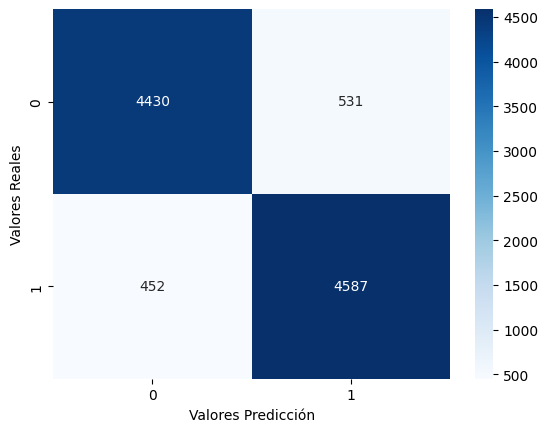

In [ ]:
y_pred_encoded = mejor_modelo_stacking1.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Ahora probaremos optimizando hiperparámetros del segundo modelo, que tiene como bases árbol de decisión, regresión logística y SVM lineal y una regresión logística como estimador final.

In [ ]:
modelo1 = DecisionTreeClassifier()
modelo2 = LogisticRegression(max_iter=500)
modelo3 = LinearSVC()

meta_model = LogisticRegression(max_iter=500)

ensamble = StackingClassifier(
    estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)],
    final_estimator=meta_model
)

pipeline = make_pipeline(
    TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2)),
    ensamble
)

parametros_ensamble = {
    'stackingclassifier__modelo1__criterion': ['gini', 'entropy'],
    'stackingclassifier__modelo1__max_depth': [5, 10, 20],
    'stackingclassifier__modelo2__C': [0.1, 1, 10],
    'stackingclassifier__modelo3__C': [0.1, 1, 10]
}

random_search = RandomizedSearchCV(pipeline, parametros_ensamble, scoring='f1', n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo_stacking = random_search.best_estimator_

print(f"Mejores parámetros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

In [ ]:
mejor_modelo_stacking.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('modelo1',
                                                 DecisionTreeClassifier(max_depth=5)),
                                                ('modelo2',
                                                 LogisticRegression(C=1,
                                                                    max_iter=500)),
                                                ('modelo3',
                                                 MultinomialNB(alpha=0.1))],
                                    final_estimator=LinearSVC(C=0.1)))])

Obtuvimos 89.32% en entrenamiento y 73.17% en test, no mejora las métricas del modelo anterior.

La accuracy es 0.8933
La precision es 0.8933993043794513
El recall es 0.8932396847024173
El F1 es 0.8932769382135786


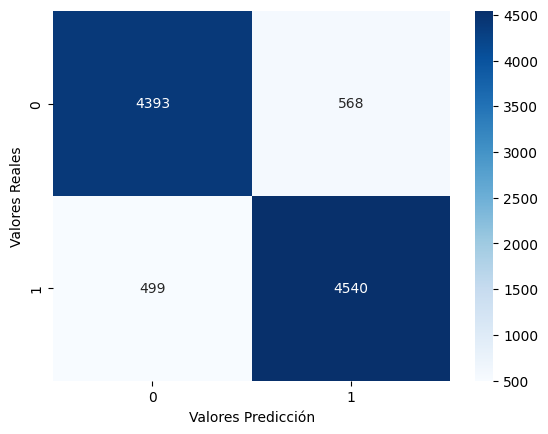

In [ ]:
y_pred_encoded = mejor_modelo_stacking.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Otra optimización de hiperparámetros del primer modelo.

In [ ]:
parametros_ensamble = {
    'stackingclassifier__modelo1__C': [0.2, 0.5, 1],
    'stackingclassifier__modelo2__n_estimators': [150, 200, 300, 350],
    'stackingclassifier__modelo2__max_depth': [5, 10, 15],
    'stackingclassifier__modelo3__alpha': [0.1, 0.5, 1],
    'stackingclassifier__final_estimator__C': [0.1, 1, 10]
}

modelo1 = LinearSVC()
modelo2 = RandomForestClassifier()
modelo3 = MultinomialNB()

meta_model = LogisticRegression(max_iter=500)

ensamble = StackingClassifier(estimators=[('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)],
                              final_estimator=meta_model,
                              cv=5)


pipeline = make_pipeline(TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2)),
                         ensamble)


random_search = RandomizedSearchCV(pipeline, parametros_ensamble, scoring='f1', n_iter=3, cv=5, random_state=42)
random_search.fit(X_train, y_train_encoded)

mejores_parametros = random_search.best_params_
mejor_puntaje = random_search.best_score_
mejor_modelo_stacking1 = random_search.best_estimator_

print(f"Mejores parametros: {mejores_parametros}")
print(f"Mejor puntaje: {mejor_puntaje}")

Mejores parametros: {'stackingclassifier__modelo3__alpha': 0.1, 'stackingclassifier__modelo2__n_estimators': 300, 'stackingclassifier__modelo2__max_depth': 15, 'stackingclassifier__modelo1__C': 1, 'stackingclassifier__final_estimator__C': 0.1}
Mejor puntaje: 0.8992694258513664


In [ ]:
mejor_modelo_stacking1.fit(X_train, y_train_encoded)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('stackingclassifier',
                 StackingClassifier(cv=5,
                                    estimators=[('modelo1', LinearSVC(C=1)),
                                                ('modelo2',
                                                 RandomForestClassifier(max_depth=15,
                                                                        n_estimators=300)),
                                                ('modelo3',
                                                 MultinomialNB(alpha=0.1))],
                                    final_estimator=LogisticRegression(C=0.1,
                                                                       max_iter=500)))])

No logramos mejorar la métrica en este caso.

La accuracy es 0.9058
La precision es 0.9059078836626318
El recall es 0.9057396652012308
El F1 es 0.905779361911433


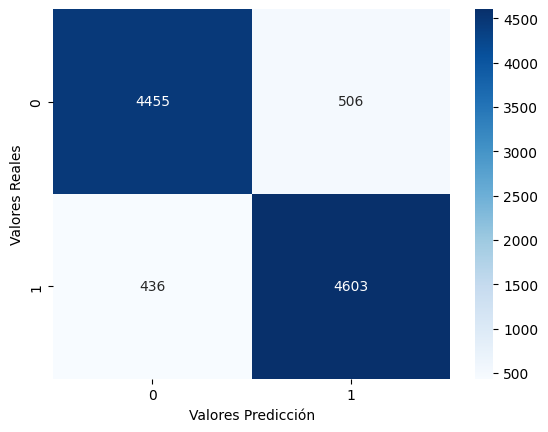

In [ ]:
y_pred_encoded = mejor_modelo_stacking1.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

# Redes Neuronales

Vamos a recuperar la función para calcular el F1 score que utilizamos en el TP1, basada en la implementación mostrada en [este artículo](https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d)

In [12]:
def get_f1(y_true, y_pred): # taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Probamos utilizar el preprocesamiento de los otros modelos para RN pero los tiempos de entrenamiento eran excesivamente grandes (aprox. 2 horas por época), por lo que decidimos hacer otro preprocesamiento para entrenar RN.

Tokenización de textos. Vamos a eliminar las stopwords y quedarnos con los primeros 600 caracteres de la review. Esto es porque creemos que es posible conocer el sentimiento de una crítica con las primeras oraciones.

In [13]:
def remove_stopwords(review):
    tokens = review.split() 
    tokens = [token for token in tokens if token.lower() not in stopwords]
    review_without_stopwords =  ' '.join(tokens)
    return review_without_stopwords[:600]

ds_trabajo["review_es"] = ds_trabajo["review_es"].apply(remove_stopwords)

Vamos a conservar las 10000 palabras del vocabulario con más ocurrencias para simplificar los datos.

In [14]:
from collections import Counter

word_counter = Counter()

for review in ds_trabajo["review_es"]:
    words = review.split()
    word_counter.update(words)

In [15]:
top_words = word_counter.most_common(10000)
print(top_words[:20])

[('película', 71849), ('películas', 15926), ('tan', 14618), ('ser', 13943), ('historia', 13592), ('ver', 13520), ('solo', 13450), ('...', 12859), ('si', 12001), ('realmente', 11369), ('película,', 10177), ('the', 9669), ('gran', 9287), ('vez', 9045), ('mejor', 8244), ('puede', 7896), ('hace', 7877), ('personas', 7150), ('visto', 7091), ('bastante', 6852)]


In [16]:
# Creamos una instancia de Tokenizer con las palabras más frecuentes
tokenizer_frecuentes = Tokenizer(num_words=10000)
tokenizer_frecuentes.fit_on_texts([tupla[0] for tupla in top_words])

# Obtenemos las secuencias de tokens usando el Tokenizer con las palabras más frecuentes
secuencias = tokenizer_frecuentes.texts_to_sequences(ds_trabajo["review_es"])

longitud_secuencia = max(len(secuencia) for secuencia in secuencias)

# Aplicamos padding a las secuencias para que todas tengan la misma longitud
secuencias_pad = pad_sequences(secuencias, maxlen=longitud_secuencia)

Hacemos la separación Train-test split, con proporción 70/30.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(secuencias_pad, ds_trabajo.sentimiento, test_size=0.3, random_state=42)

Verificamos que no haya desequilibrio de clases en los conjuntos 

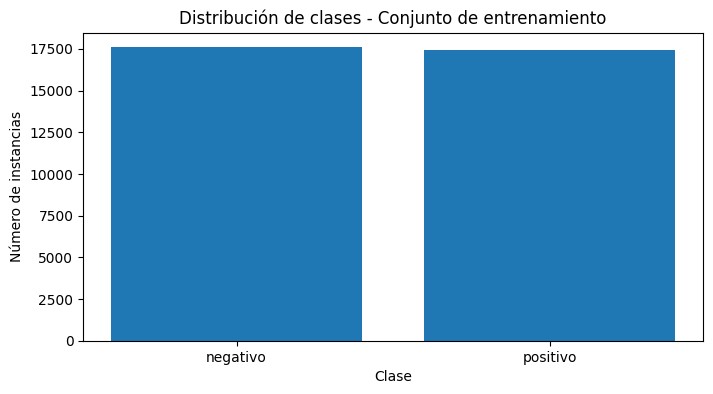

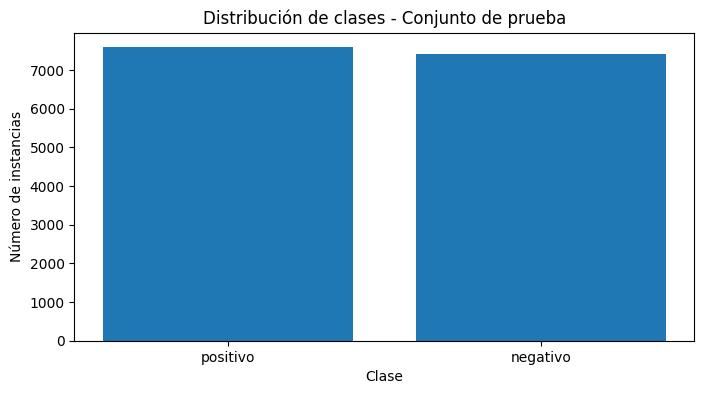

In [18]:
import matplotlib.pyplot as plt

train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts()

# Visualización del conjunto de entrenamiento
plt.figure(figsize=(8, 4))
plt.bar(train_class_counts.index, train_class_counts.values)
plt.title('Distribución de clases - Conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.show()

# Visualización del conjunto de prueba
plt.figure(figsize=(8, 4))
plt.bar(test_class_counts.index, test_class_counts.values)
plt.title('Distribución de clases - Conjunto de prueba')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.show()

Codificamos 'positivo' y 'negativo' en 1 y 0.

In [19]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

Vamos a estar probando distintas arquitecturas para redes neuronales superficiales convolucionales y recurrentes.

### Arquitectura 1: RN secuencial básica con capas densas (RN 1)

La primera arquitectura que probaremos está compuesta por:

* Capa de Embedding: para convertir los índices enteros de las palabras en vectores de longitud fija. Indicamos las 10000 palabras del vocabulario y dimensión 100. La longitud máxima de las entradas queda determinado por la variable longitud_secuencia

* Capa de Flatten: para convertir los tensores de entrada de dos dimensiones a una sola dimensión, para que pueda conectarse a las capas densas siguientes

* Capa Dense: con 32 neuronas y función de activación ReLU

* Capa Dense de salida: con 1 neurona y función de activación sigmoidal

Luego compilamos con el optimizador Adam y la función de pérdida binary crossentropy. Vamos a empezar con 5 épocas y batches de 32.

In [116]:
modelo = Sequential()
modelo.add(Embedding(10000, 100, input_length=longitud_secuencia))
modelo.add(Flatten())
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=[get_f1])

modelo.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/5
1094/1094 [==============================] - 29s 25ms/step - loss: 0.4486 - get_f1: 0.7665 - val_loss: 0.3723 - val_get_f1: 0.8415
Epoch 2/5
1094/1094 [==============================] - 25s 23ms/step - loss: 0.2131 - get_f1: 0.9170 - val_loss: 0.4250 - val_get_f1: 0.8292
Epoch 3/5
1094/1094 [==============================] - 31s 28ms/step - loss: 0.0261 - get_f1: 0.9938 - val_loss: 0.5611 - val_get_f1: 0.8256
Epoch 4/5
1094/1094 [==============================] - 25s 23ms/step - loss: 0.0023 - get_f1: 0.9998 - val_loss: 0.6647 - val_get_f1: 0.8292
Epoch 5/5
1094/1094 [==============================] - 26s 24ms/step - loss: 4.3296e-04 - get_f1: 1.0000 - val_loss: 0.7263 - val_get_f1: 0.8307


Para realizar las predicciones, vamos a establecer el umbral de probabilidad de pertenecer a una clase en 0.45 y luego tendremos que revertir la codificación de 0 y 1 a 'negativo' y 'positivo'.

469/469 [==============================] - 2s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


La accuracy es 0.8329333333333333
La precision es 0.8331257049851752
El recall es 0.8327752962332705
El F1 es 0.8328433629450048


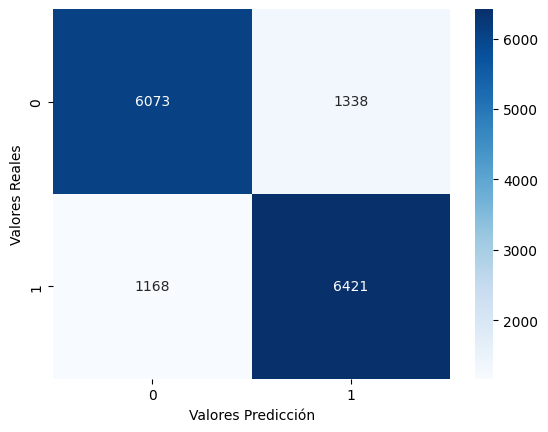

In [119]:
y_pred_norm_encoded = modelo.predict(X_test)
y_pred_encoded = np.where(y_pred_norm_encoded > 0.45, 1, 0)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Observando el output del fit en cuanto al entrenamiento y la validación, la red neuronal ha logrado un buen rendimiento en el conjunto de entrenamiento, la pérdida ha disminuido y el F1 score ha aumentado a lo largo de las épocas. Sin embargo, en el conjunto de validación los resultados son menos favorables. Si bien el F1 score no es bajo, la pérdida es muy alta. Podemos decir entonces que nuestro modelo está experimentando un sobreajuste y no generaliza bien con nuevos datos.

### Arquitectura 2: RN recurrente con agrupación global y regularización (RN 8)

Complejizaremos la arquitectura probando con una Red Neuronal Recurrente, agregandole capas LSTM.

* Capa de Embedding: para convertir los índices enteros de las palabras en vectores de longitud fija. Indicamos las 10000 palabras del vocabulario y dimensión 128. La longitud máxima de las entradas queda determinado por la variable longitud_secuencia

* Capa de Flatten: para convertir los tensores de entrada de dos dimensiones a una sola dimensión, para que pueda conectarse a las capas densas siguientes

* Capa Bidirectional LSTM: con 128 neuronas y aplicada en dos direcciones, tanto hacia adelante como hacia atrás, para que la red pueda capturar información tanto de contextos pasados como futuros

* Capa GlobalMaxPooling1D (de agrupación global): para extracción de la máxima activación a lo largo de la dimensión temporal, reduciendo la salida a un vector unidimensional de características representativas

* Capa densa (Dense): con 64 neuronas y función de activación ReLU para introducir no linealidad en la red

* Capa de dropout (Dropout): una capa de regularización para desactivar aleatoriamente algunas neuronas y evitar el sobreajuste que notamos en la arquitectura anterior

* Capa densa de salida: con función de activación sigmoide


Compilaremos este modelo con la función de pérdida binary_crossentropy y el optimizador Adam con una tasa de aprendizaje de 0.001. Por último, vamos a agregar otra regularización al utilizar EarlyStopping para frenar el entrenamiento si no hay mejora del F1 score en validación luego de 3 épocas.

In [22]:
from tensorflow.keras.layers import Bidirectional, GlobalMaxPooling1D
from keras.layers import LSTM, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Crear el modelo
modelo = Sequential()
modelo.add(Embedding(10000, 128, input_length=longitud_secuencia))
modelo.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
# modelo.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
modelo.add(GlobalMaxPooling1D())
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[get_f1])

# Utilizar EarlyStopping para detener el entrenamiento si no hay mejora en la métrica F1
early_stopping = EarlyStopping(monitor='val_get_f1', patience=3, mode='max', restore_best_weights=True)

# Entrenar el modelo
modelo.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])


Epoch 1/25
1094/1094 [==============================] - 1295s 1s/step - loss: 0.4587 - get_f1: 0.7687 - val_loss: 0.3770 - val_get_f1: 0.8157
Epoch 2/25
1094/1094 [==============================] - 1199s 1s/step - loss: 0.3233 - get_f1: 0.8635 - val_loss: 0.3676 - val_get_f1: 0.8351
Epoch 3/25
1094/1094 [==============================] - 1116s 1s/step - loss: 0.2583 - get_f1: 0.8924 - val_loss: 0.4053 - val_get_f1: 0.8252
Epoch 4/25
1094/1094 [==============================] - 1222s 1s/step - loss: 0.1903 - get_f1: 0.9264 - val_loss: 0.4786 - val_get_f1: 0.8317
Epoch 5/25
1094/1094 [==============================] - 1470s 1s/step - loss: 0.1333 - get_f1: 0.9509 - val_loss: 0.5323 - val_get_f1: 0.8187


469/469 [==============================] - 66s 138ms/step


C:\Users\camila.bartocci.GLOBALAD\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


La accuracy es 0.8366
La precision es 0.8377690690638342
El recall es 0.8362423000045927
El F1 es 0.8363372660303441


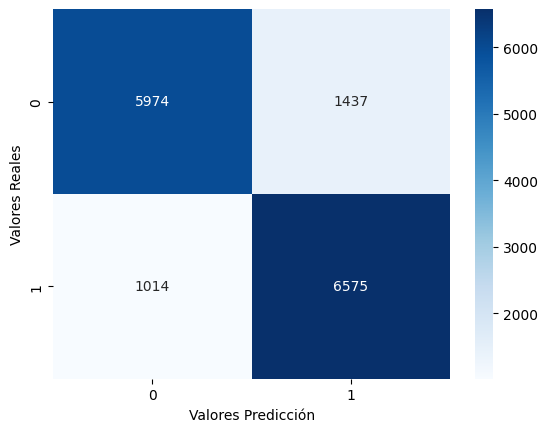

In [23]:
y_pred_norm_encoded = modelo.predict(X_test)
y_pred_encoded = np.where(y_pred_norm_encoded > 0.45, 1, 0)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Los resultados del entrenamiento un F1 score de 0.8363, mejorando ligeramente las métricas respecto de la arquitectura anterior, habiendo frenado el entrenamiento a la quinta época por no observar mejoras en el F1 en validación. Sin embargo, a pesar de las regularizaciones implementadas y el cambio de red neuronal, se mantiene la tendencia a ajustarse rápidamente a los datos de entrenamiento y el incremento de la pérdida en validación.

### Arquitectura 3: RN recurrente con regularización (RN 5)

Esta arquitectura esta compuesta por las siguientes capas:

* Capa de Embedding: para convertir los índices enteros de las palabras en vectores de longitud fija. Indicamos las 10000 palabras del vocabulario y dimensión 128. La longitud máxima de las entradas queda determinado por la variable longitud_secuencia

* Capa LSTM 1: con 256 neuronas y con retorno de secuencias completas para que la siguiente capa LSTM pueda procesar secuencias de entrada completas en lugar de solo la última salida

* Capa LSTM 2: con 128 neuronas, esta devuelve la última secuencia

* Capa densa: con 128 neuronas y utiliza la función de activación ReLU

* Capa de dropout: con una tasa del 0.5 para regularizar el modelo y prevenir el sobreajuste

* Capa densa de salida: con activación sigmoide

El modelo se compila con la función de pérdida binary_crossentropy y el optimizador Adam con una tasa de aprendizaje de 0.001. Además, mantenemos el uso de EarlyStopping para detener el entrenamiento si no hay mejoras. 

In [ ]:
from keras.layers import LSTM, Dropout
from keras.optimizers import Adam

# Crear el modelo
modelo = Sequential()
modelo.add(Embedding(10000, 128, input_length=longitud_secuencia))
modelo.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
modelo.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[get_f1])


# Utilizar EarlyStopping para detener el entrenamiento si no hay mejora en la métrica F1
early_stopping = EarlyStopping(monitor='val_get_f1', patience=3, mode='max', restore_best_weights=True)

# Entrenar el modelo
modelo.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])


Epoch 1/25
1094/1094 [==============================] - 1026s 935ms/step - loss: 0.4624 - get_f1: 0.7598 - val_loss: 0.4147 - val_get_f1: 0.8066
Epoch 2/25
1094/1094 [==============================] - 1058s 967ms/step - loss: 0.3334 - get_f1: 0.8576 - val_loss: 0.3894 - val_get_f1: 0.8116
Epoch 3/25
1094/1094 [==============================] - 1479s 1s/step - loss: 0.2674 - get_f1: 0.8890 - val_loss: 0.4311 - val_get_f1: 0.7918
Epoch 4/25
1094/1094 [==============================] - 1173s 1s/step - loss: 0.2052 - get_f1: 0.9185 - val_loss: 0.5205 - val_get_f1: 0.8224
Epoch 5/25
1094/1094 [==============================] - 989s 904ms/step - loss: 0.1471 - get_f1: 0.9465 - val_loss: 0.5200 - val_get_f1: 0.7925
Epoch 6/25
1094/1094 [==============================] - 1004s 918ms/step - loss: 0.1085 - get_f1: 0.9606 - val_loss: 0.6619 - val_get_f1: 0.8110
Epoch 7/25
1094/1094 [==============================] - 1010s 924ms/step - loss: 0.0803 - get_f1: 0.9724 - val_loss: 0.8134 - val_get_f1:

469/469 [==============================] - 131s 279ms/step
La accuracy es 0.8220666666666666
La precision es 0.8234726049010417


c:\Users\franco.patiño\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El recall es 0.8216626113696828
El F1 es 0.8217246561159457


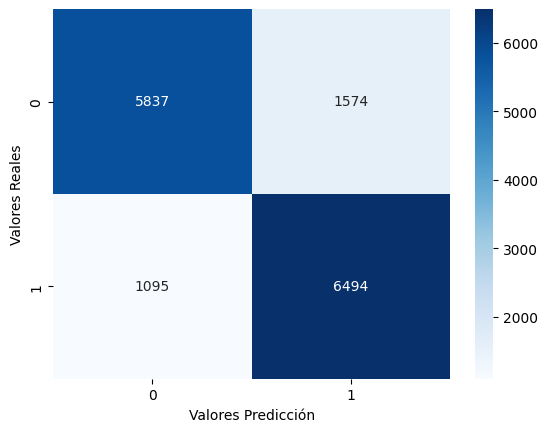

In [ ]:
y_pred_norm_encoded = modelo.predict(X_test)
y_pred_encoded = np.where(y_pred_norm_encoded > 0.45, 1, 0)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

En cuanto a la performance del modelo, los resultados del entrenamiento muestran un F1 score de 0.8217 en el conjunto de prueba, no muestra mejoras.

### Arquitectura 4: RN recurrente con GRU bidireccional (RN 6)

En esta arquitectura, vamos a estar introduciendo una nueva capa:
* Capa GRU bidireccional (Bidirectional GRU): 128 neuronas y aplicada en dos direcciones, hacia adelante y hacia atrás

In [ ]:
from keras.layers import Bidirectional, GRU, Dense

# Crear el modelo
modelo = Sequential()
modelo.add(Embedding(10000, 128, input_length=longitud_secuencia))
modelo.add(Bidirectional(GRU(128, dropout=0.2, recurrent_dropout=0.2)))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[get_f1])

# Utilizar EarlyStopping para detener el entrenamiento si no hay mejora en la métrica F1
early_stopping = EarlyStopping(monitor='val_get_f1', patience=3, mode='max', restore_best_weights=True)

# Entrenar el modelo
modelo.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/25
1094/1094 [==============================] - 438s 397ms/step - loss: 0.4750 - get_f1: 0.7572 - val_loss: 0.3705 - val_get_f1: 0.8404
Epoch 2/25
1094/1094 [==============================] - 432s 395ms/step - loss: 0.3193 - get_f1: 0.8647 - val_loss: 0.3610 - val_get_f1: 0.8464
Epoch 3/25
1094/1094 [==============================] - 740s 677ms/step - loss: 0.2363 - get_f1: 0.9031 - val_loss: 0.4307 - val_get_f1: 0.8329
Epoch 4/25
1094/1094 [==============================] - 766s 701ms/step - loss: 0.1644 - get_f1: 0.9352 - val_loss: 0.5062 - val_get_f1: 0.8246
Epoch 5/25
1094/1094 [==============================] - 719s 657ms/step - loss: 0.1133 - get_f1: 0.9568 - val_loss: 0.5787 - val_get_f1: 0.8262


469/469 [==============================] - 33s 69ms/step
La accuracy es 0.8426666666666667


c:\Users\franco.patiño\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


La precision es 0.8455542016412158
El recall es 0.842119136456531
El F1 es 0.8421693500046965


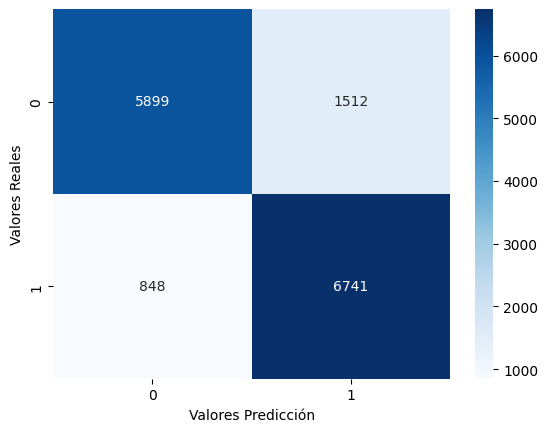

In [ ]:
y_pred_norm_encoded = modelo.predict(X_test)
y_pred_encoded = np.where(y_pred_norm_encoded > 0.45, 1, 0)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

El F1 score obtenido es 0.8421, el mejor hasta el momento en cuanto a redes neuronales.

### Arquitectura 5: RN recurente con GRU (RN 7, la que dio 0.55398 en kaggle)

Esta arquitectura tiene las siguientes capas:

* Capa de Embedding: para convertir los índices enteros de las palabras en vectores de longitud fija. Indicamos las 10000 palabras del vocabulario y dimensión 128. La longitud máxima de las entradas queda determinado por la variable longitud_secuencia

* Capa de Dropout espacial (SpatialDropout1D): aplica dropout a la secuencia de incrustaciones en 1D, para reducir el sobreajuste

* Capa GRU bidireccional: una capa GRU con 128 neuronas y aplica la operación en dos direcciones. La capa GRU tiene dropout y recurrent_dropout configurados en 0.2 y se configura para devolver secuencias completas

* Capa GRU: Utiliza una capa GRU con 64 unidades sin devolver secuencias completas

* Capa densa: 64 unidades y función de activación ReLU

* Capa de dropout: dropout con una tasa de 0.5 para regularizar el modelo

* Capa densa de salida: función de activación sigmoide

El modelo se compila con la función de pérdida binary_crossentropy y el optimizador Adam con una tasa de aprendizaje de 0.001, y conservamos EarlyStopping.

In [ ]:
from tensorflow.keras.layers import GRU, SpatialDropout1D, Bidirectional, GlobalMaxPooling1D
from keras.layers import LSTM, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Crear el modelo
modelo = Sequential()
modelo.add(Embedding(10000, 128, input_length=longitud_secuencia))
modelo.add(SpatialDropout1D(0.2))
modelo.add(GRU(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
modelo.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[get_f1])

# Utilizar EarlyStopping para detener el entrenamiento si no hay mejora en la métrica F1
early_stopping = EarlyStopping(monitor='val_get_f1', patience=3, mode='max', restore_best_weights=True)

# Entrenar el modelo
history = modelo.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])


Epoch 1/25
1094/1094 [==============================] - 578s 524ms/step - loss: 0.4638 - get_f1: 0.7638 - val_loss: 0.3906 - val_get_f1: 0.8315
Epoch 2/25
1094/1094 [==============================] - 575s 526ms/step - loss: 0.3224 - get_f1: 0.8642 - val_loss: 0.3617 - val_get_f1: 0.8372
Epoch 3/25
1094/1094 [==============================] - 567s 519ms/step - loss: 0.2540 - get_f1: 0.8969 - val_loss: 0.3879 - val_get_f1: 0.8309
Epoch 4/25
1094/1094 [==============================] - 567s 519ms/step - loss: 0.1889 - get_f1: 0.9247 - val_loss: 0.4720 - val_get_f1: 0.8287
Epoch 5/25
1094/1094 [==============================] - 585s 534ms/step - loss: 0.1447 - get_f1: 0.9442 - val_loss: 0.5735 - val_get_f1: 0.8136


469/469 [==============================] - 26s 55ms/step
La accuracy es 0.8367333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


La precision es 0.8389079247541715
El recall es 0.8362506389566431
El F1 es 0.8363142388579357


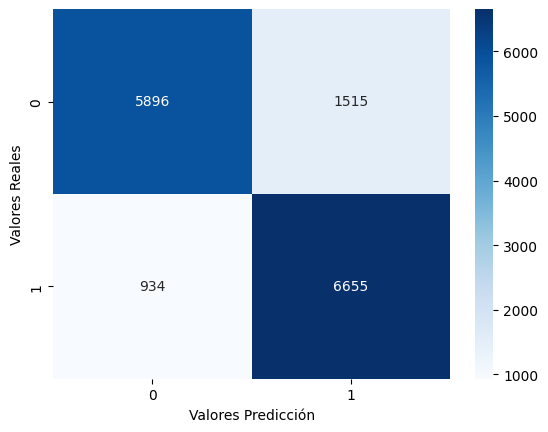

In [ ]:
y_pred_norm_encoded = modelo.predict(X_test)
y_pred_encoded = np.where(y_pred_norm_encoded > 0.45, 1, 0)
y_pred = encoder.inverse_transform(y_pred_encoded)
mostrar_metricas(y_test, y_pred)

Obtuvimos un F1 score de 0.8363, el cual no es el mejor en entrenamiento pero fue el mejor en Kaggle.

El siguiente gráfico muestra el cambio de la métrica F1 score en entrenamiento y en validación, a lo largo de las épocas. Si bien mostramos el gráfico de esta última arquitectura particular, esta fue la tendencia de todas las que probamos. La métrica en entrenamiento mejoraba con grandes saltos, mientras que la métrica en validación se estancaba o incluso disminuía.

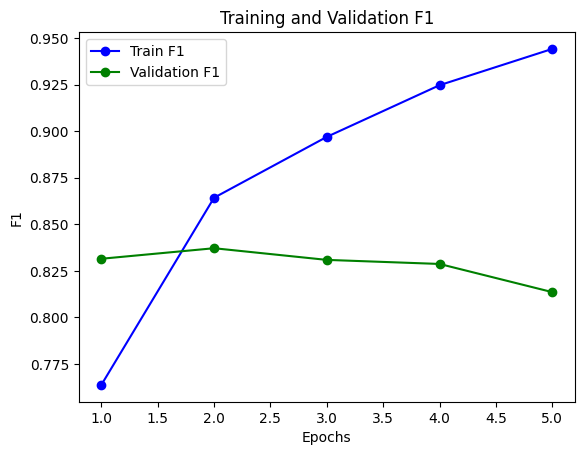

In [ ]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación
train_f1 = history.history['get_f1']
val_f1 = history.history['val_get_f1']

# Crear gráfico de F1 vs épocas
epochs = range(1, len(train_f1) + 1)
plt.plot(epochs, train_f1, 'bo-', label='Train F1')
plt.plot(epochs, val_f1, 'go-', label='Validation F1')
plt.title('Training and Validation F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend()
plt.show()
